## Breast Cancer Classification


In [ ]:
import tensorflow as tf
# importing required modules
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Add, Subtract, Activation, BatchNormalization ,Dropout, Flatten, Dense, Conv2D, AveragePooling2D, MaxPooling2D, Input, Subtract
import warnings
from tensorflow.keras.callbacks import ModelCheckpoint
import cv2
import tensorflow as tf
from skimage import transform
import numpy as np
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model
import numpy as np
import keras.utils
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras.models import model_from_json
IMAGE_SIZE = (224, 340)
CROP_SIZE = (224, 224)
BATCH_SIZE = 128

In [3]:
# Load the Gdrive

from google.colab import drive
drive.mount('/content/drive')

# Load the train/val dataset

#dataset = load_dataset("/content/drive/MyDrive/Lung_Cancer/Augmented-Final/", data_dir="./Resized/")

# Load the dataset
#test_dataset=load_dataset("/content/drive/MyDrive/Skin_Cancer/Augmented-Final/test")

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Load the DenseNet-201 model without the top layer
base_model = tf.keras.applications.DenseNet201(include_top=False, weights='imagenet', input_shape=(250, 250, 3))

# Make sure you replace YOUR_IMAGE_HEIGHT and YOUR_IMAGE_WIDTH with the appropriate dimensions for your dataset.

# Freezing the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Define your MLP architecture
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)  # This layer will convert the features to a single vector per image
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Dropout can help against overfitting
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(3, activation='softmax')(x)  # NUM_CLASSES should be the number of categories in your LC25000 dataset.

# Combine base model and MLP
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on your LC25000 dataset.
# Make sure your data is preprocessed and resized to the appropriate input shape for DenseNet-201.
# Use model.fit() for training.



74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
def model_probas(test_dataset, model):
    """Returns the predicted probabilities and the true labels
    for a given (inference) dataset on a given model."""
    y_test, y_probas = [], []

    for image_batch, label_batch in test_dataset:
        y_test.append(label_batch)
        y_probas.append(model.predict(image_batch))

    y_test, y_probas = (
        tf.concat(y_test, axis=0),
        tf.concat(y_probas, axis=0))

    return {
        'y_test': y_test,
        'y_probas': y_probas
    }

In [ ]:
!cp -r /content/drive/MyDrive/Breast_Cancer/Dataset-Resized/test /content/drive/MyDrive/Breast_Cancer/Dataset-SOTA-Experiment

In [ ]:
!pip install split-folders

In [7]:
!pip install split-folders

In [8]:
# import splitfolders
# path_src = '/content/drive/MyDrive/Lung_Cancer/Augmented-Final/Resized'
# path_out = '/content/drive/MyDrive/Lung_Cancer/Augmented-Final/Resized'
# splitfolders.ratio(path_src, output=path_out, seed=1337, ratio=(.40, .30, .30), group_prefix=None, move=False) # default values


Copying files: 15000 files [05:34, 44.81 files/s] 


In [9]:

# augmenting the ibput imges
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
# initializing paths of input images
path_images = '/content/drive/MyDrive/Lung_Cancer/Augmented-Final/Resized'

batch_size = 64
image_shape = (250,250,3)

# train on images
train_image_gen = image_gen.flow_from_directory(path_images + '/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

valid_image_gen = image_gen.flow_from_directory(path_images + '/val',
                                                target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')




Found 6000 images belonging to 3 classes.
Found 4500 images belonging to 3 classes.


In [10]:
# warnings.filterwarnings('ignore')

#es = EarlyStopping(monitor='val_acc', mode='max', verbose=1 , patience = 10)
cb = []
checkpoint_dir = '/content/drive/MyDrive/Lung_Cancer/40:30:30/Checkpoints/'

# checkpoint = ModelCheckpoint("california.h5", save_best_only=True)
# ckp_saver = ModelCheckpoint(checkpoint_dir + "/model.{epoch:02d}-{loss:.2f}.h5", monitor='val_loss', verbose = 0,
#                                     save_best_only=True,
#                                     save_weights_only=True, mode='auto', period=1)
# cb.append(ckp_saver)
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)

results = model.fit_generator(train_image_gen,epochs=30,
                              steps_per_epoch=train_image_gen.samples//batch_size,
                              validation_data=valid_image_gen,
                             validation_steps=valid_image_gen.samples//batch_size,
                              callbacks=[es],
                              verbose = 1)
model.save('/content/drive/MyDrive/Lung_Cancer/40:30:30/Checkpoints/DenseNet201.h5')

<ipython-input-10-394b5d60dcc5>:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=30,


Epoch 1/30
93/93 [==============================] - 83s 612ms/step - loss: 0.2572 - accuracy: 0.9018 - val_loss: 0.1082 - val_accuracy: 0.9594
Epoch 2/30
93/93 [==============================] - 49s 530ms/step - loss: 0.1358 - accuracy: 0.9488 - val_loss: 0.0792 - val_accuracy: 0.9685
Epoch 3/30
93/93 [==============================] - 50s 537ms/step - loss: 0.0978 - accuracy: 0.9613 - val_loss: 0.0611 - val_accuracy: 0.9741
Epoch 4/30
93/93 [==============================] - 50s 543ms/step - loss: 0.0868 - accuracy: 0.9643 - val_loss: 0.0664 - val_accuracy: 0.9732
Epoch 5/30
93/93 [==============================] - 51s 543ms/step - loss: 0.0756 - accuracy: 0.9727 - val_loss: 0.0550 - val_accuracy: 0.9783
Epoch 6/30
93/93 [==============================] - 50s 543ms/step - loss: 0.0655 - accuracy: 0.9739 - val_loss: 0.0443 - val_accuracy: 0.9842
Epoch 7/30
93/93 [==============================] - 51s 545ms/step - loss: 0.0472 - accuracy: 0.9823 - val_loss: 0.0464 - val_accuracy: 0.9819

In [16]:
path_images = '/content/drive/MyDrive/Lung_Cancer/Augmented-Final/Resized'

test_datagen = ImageDataGenerator(
        rescale=1/255)
test_generator = test_datagen.flow_from_directory(path_images + '/test/',
                                                        target_size=image_shape[:2],
                                                        batch_size=batch_size,
                                                        shuffle = False,
                                                        class_mode='categorical')

Found 4500 images belonging to 3 classes.


In [17]:
loaded_model = load_model('/content/drive/MyDrive/Lung_Cancer/40:30:30/Checkpoints/DenseNet201.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 256, 256, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 125, 125, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [14]:
200 / 64

3.125

In [18]:
import numpy as np
# test_generator.reset()
Y_pred = loaded_model.predict_generator(test_generator, len(test_generator.classes) // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['0: Lung-Benign_Tissue', '1 : Lung_Adenocarcinoma', '2 : Lung_Squamous_Cell_Carcinoma']
print(classification_report(test_generator.classes, y_pred, target_names=target_names,digits=4))

<ipython-input-18-b80ef6335edf>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = loaded_model.predict_generator(test_generator, len(test_generator.classes) // batch_size+1)


Confusion Matrix
[[1499    1    0]
 [   4 1490    6]
 [   0   29 1471]]
Classification Report
                                  precision    recall  f1-score   support

           0: Lung-Benign_Tissue     0.9973    0.9993    0.9983      1500
         1 : Lung_Adenocarcinoma     0.9803    0.9933    0.9868      1500
2 : Lung_Squamous_Cell_Carcinoma     0.9959    0.9807    0.9882      1500

                        accuracy                         0.9911      4500
                       macro avg     0.9912    0.9911    0.9911      4500
                    weighted avg     0.9912    0.9911    0.9911      4500



### Install dependencies

# Compute metrics

In [19]:
#!pip install -q datasets transformers
#!pip install accelerate
#!pip install wandb

#load libraries
import matplotlib.pyplot as plt
import numpy as np
# Import the image processor compatible with the given model architecture
import torch
# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

<Axes: xlabel='Predicted Labels', ylabel='Actual Labels'>

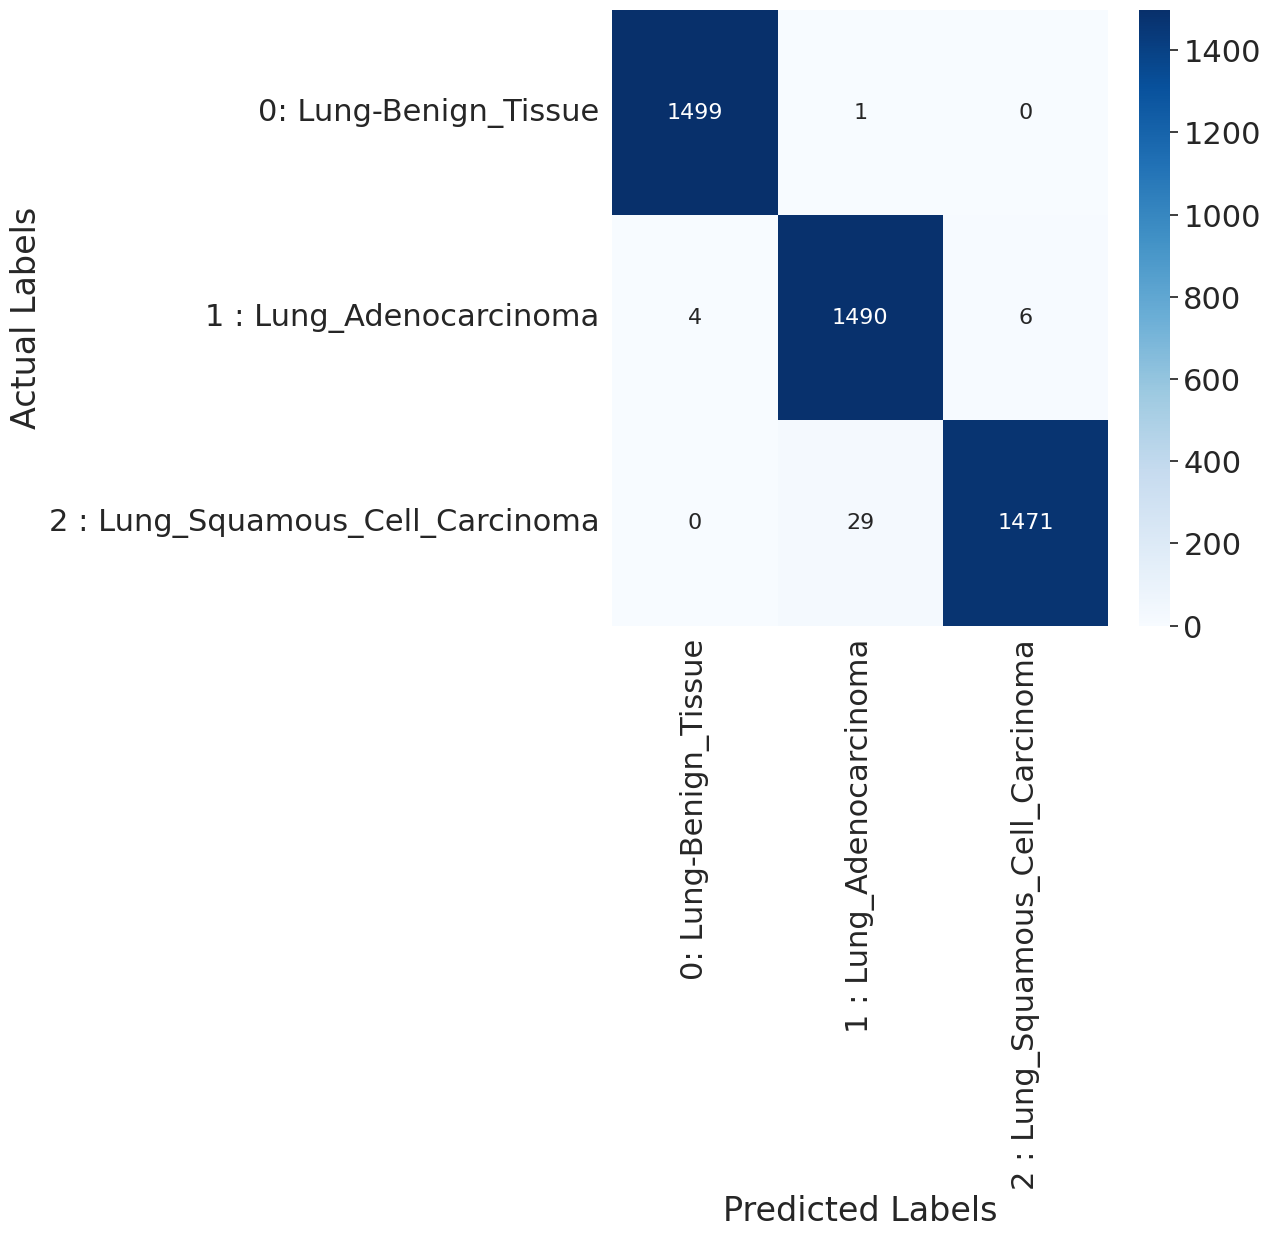

In [20]:
# compute all scores macro and weighted
def evaluation_summary(desc, predictions, true_labels):
    accuracy = accuracy_score(predictions, true_labels)
    precision = precision_score(predictions, true_labels, average='macro')
    recall = recall_score(predictions, true_labels, average='macro')
    f1 = fbeta_score(predictions, true_labels, beta=1, average='macro')
    weighted_precision = precision_score(predictions, true_labels, average='weighted')
    weighted_recall = recall_score(predictions, true_labels, average='weighted')
    weighted_f1 = fbeta_score(predictions, true_labels, beta=1, average='weighted')
    results = {
            "classifier": [desc],
            "accuracy": [round(accuracy,4)],
            "macro_precision": [round(precision,4)],
            "macro_recall": [round(recall,4)],
            "macro_f1": [round(f1,4)],
            "weighted_precision": [round(weighted_precision,4)],
            "weighted_recall": [round(weighted_recall,4)],
            "weighted_f1": [round(weighted_f1,4)]
            }
    return pd.DataFrame.from_dict(results)

# test_pred_labels=predictions.argmax(axis=1)

data = confusion_matrix(test_generator.classes,y_pred,labels=[0,1,2])
df_cm = pd.DataFrame(data, columns=['0: Lung-Benign_Tissue', '1 : Lung_Adenocarcinoma', '2 : Lung_Squamous_Cell_Carcinoma'], index = ['0: Lung-Benign_Tissue', '1 : Lung_Adenocarcinoma', '2 : Lung_Squamous_Cell_Carcinoma'])
df_cm.index.name = 'Actual Labels'
df_cm.columns.name = 'Predicted Labels'
plt.figure(figsize = (8,8))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g')# font size


In [21]:
beit_test_result=evaluation_summary("DenseNET201-LungCancer-Classification-Test data", y_pred , test_generator.classes)

summary_eval = pd.concat([beit_test_result], axis=0)
summary_eval = summary_eval.reset_index(drop=True)
color = (summary_eval.weighted_f1 > 0).map({True: 'background-color: green', False: ''})
summary_eval.style.apply(lambda s: color)

,classifier,accuracy,macro_precision,macro_recall,macro_f1,weighted_precision,weighted_recall,weighted_f1
0,DenseNET201-LungCancer-Classification-Test data,0.991100,0.991100,0.991200,0.991100,0.991200,0.991100,0.991100
